In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go  # Import Plotly graph objects
import plotly.express as px  # Import Plotly Express

In [47]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

In [3]:
# Mounting google drive account in colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Capstone_Project_REAL_ESTATE/outlier_treated_gurgaon_real_estate.csv').drop_duplicates()

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_builtup_area,builtup_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf regal gardens,sector 90,1.26,7403.0,1702.0,super built up area 1702(158.12 sq.m.)carpet a...,3.0,3.0,3,6.0,North-East,Relatively New,1702.0,NaN,1500.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0
1,flat,tulip violet,sector 69,1.72,8730.0,1970.0,super built up area 1970(183.02 sq.m.),4.0,4.0,1,12.0,North-East,Relatively New,1970.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,86.0
2,flat,experion the heartsong,sector 108,2.28,8204.0,2779.0,super built up area 2779(258.18 sq.m.),4.0,5.0,3+,8.0,North,Relatively New,2779.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,101.0
3,flat,signature global city 92,sector 92,0.78,8047.0,969.0,super built up area 1197(111.2 sq.m.),2.0,2.0,2,2.0,not available,New Property,1197.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,47.0
4,flat,puri diplomatic greens,sector 111,3.45,11694.0,2950.0,super built up area 2950(274.06 sq.m.),4.0,5.0,3+,10.0,North,Relatively New,2949.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,101.0


In [6]:
df.isnull().sum()

property_type            0
society                  1
sector                   0
price                    0
price_per_sqft           0
area                     0
areaWithType             0
bedRoom                  0
bathroom                 0
balcony                  0
floorNum                19
facing                   0
agePossession            0
super_builtup_area    1845
builtup_area          2012
carpet_area           1844
study room               0
servant room             0
store room               0
pooja room               0
others                   0
furnishing_type          0
luxury_score             0
dtype: int64

In [7]:
df.shape

(3737, 23)

## builtup area

<Axes: xlabel='builtup_area', ylabel='super_builtup_area'>

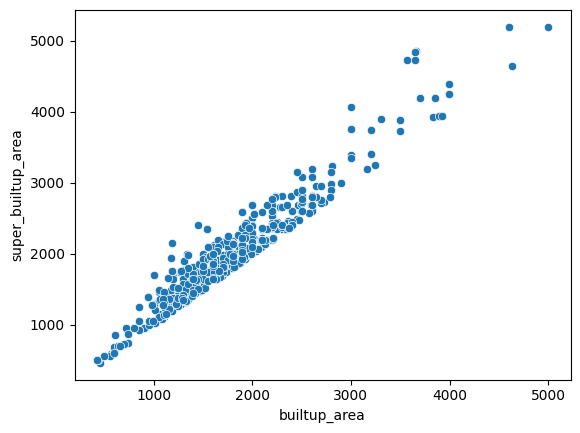

In [12]:
sns.scatterplot(x=df['builtup_area'],y=df['super_builtup_area'])

<Axes: xlabel='builtup_area', ylabel='carpet_area'>

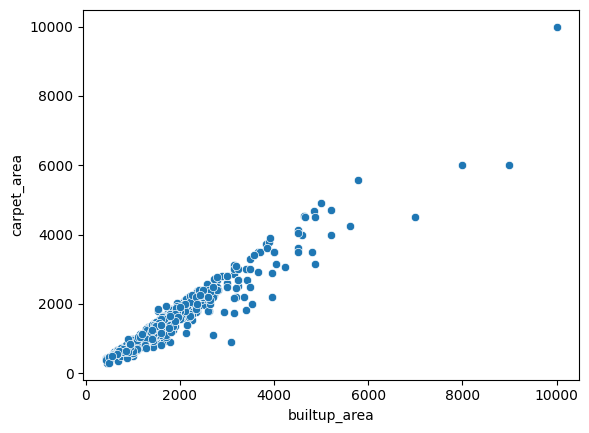

In [73]:
sns.scatterplot(x=df['builtup_area'],y=df['carpet_area'])

In [71]:
fig = px.scatter(df,x=df['builtup_area'],y=df['carpet_area'], title='Scatter Plot')

fig.show()

In [72]:
df[(df['builtup_area'] == 3077) & (df['carpet_area'] == 900)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_builtup_area,builtup_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1055,house,independent,sector 23,5.1,16569.0,3078.0,plot area 342(285.96 sq.m.)built up area: 125(104.52 sq.m.)carpet area: 100(83.61 sq.m.),3.0,2.0,0,1.0,East,Old Property,NaN,3077.0,900.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0


In [42]:
df.loc[1484,'builtup_area'] = 2250

In [43]:
df.loc[1484,'area'] = 1530

In [44]:
df.loc[1484,'price_per_sqft'] = 5882

In [33]:
df.loc[1476,'builtup_area'] = 1000

In [34]:
df.loc[1476,'area'] = 1000

In [35]:
df.loc[1476,'price_per_sqft'] = 5800

In [24]:
df.loc[2691,'area'] = 1000

In [25]:
df.loc[2691,'price_per_sqft'] = 5800

In [19]:
df.loc[591,'builtup_area'] = np.nan

In [20]:
df.loc[591,'area'] = 1500

In [75]:
df[((df['super_builtup_area'].isnull()) & (df['builtup_area'].isnull()) & (df['carpet_area'].isnull()))] # no null values with these 3 features together

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_builtup_area,builtup_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


In [77]:
all_present_df = df[~((df['super_builtup_area'].isnull()) | (df['builtup_area'].isnull()) | (df['carpet_area'].isnull()))]

In [79]:
all_present_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_builtup_area,builtup_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
16,flat,corona optus,sector 37,1.26,7250.0,1738.0,super built up area 1735(161.19 sq.m.)built up area: 1400(130.06 sq.m.)carpet area: 965(89.65 sq.m.),3.0,3.0,3,4.0,North-East,New Property,1735.0,1400.0,965.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
20,flat,emaar mgf emerald estate,sector 65,1.42,13921.0,1020.0,super built up area 1020(94.76 sq.m.)built up area: 1010(93.83 sq.m.)carpet area: 750(69.68 sq.m.),2.0,2.0,2,6.0,North-East,Relatively New,1020.0,1010.0,750.0,1.0,0.0,0.0,0.0,0.0,1.0,174.0
22,flat,vatika the seven lamps,sector 82,1.28,6819.0,1877.0,super built up area 1877(174.38 sq.m.)built up area: 1800(167.23 sq.m.)carpet area: 1500(139.35 sq.m.),3.0,3.0,3,3.0,North,Relatively New,1877.0,1800.0,1500.0,1.0,0.0,0.0,0.0,0.0,1.0,165.0
24,flat,signature global synera,sector 81,0.49,6666.0,735.0,super built up area 735(68.28 sq.m.)built up area: 700(65.03 sq.m.)carpet area: 635(58.99 sq.m.),2.0,2.0,3,5.0,South,Relatively New,735.0,700.0,635.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0
25,flat,the close north,sector 50,2.92,11209.0,2605.0,super built up area 2605(242.01 sq.m.)built up area: 2600(241.55 sq.m.)carpet area: 2100(195.1 sq.m.),3.0,3.0,3,10.0,North,Moderately Old,2605.0,2600.0,2100.0,0.0,1.0,0.0,0.0,0.0,1.0,174.0


In [80]:
all_present_df.shape

(534, 23)

In [81]:
super_to_built_up_ratio = (all_present_df['super_builtup_area']/all_present_df['builtup_area']).median()

In [82]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['builtup_area']).median()

In [83]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.1052289815447711 0.9


In [85]:
# both super and carpet present and built up is null
sbc_df = df[~(df['super_builtup_area'].isnull()) & (df['builtup_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [86]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_builtup_area,builtup_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf regal gardens,sector 90,1.26,7403.0,1702.0,super built up area 1702(158.12 sq.m.)carpet area: 1500(139.35 sq.m.),3.0,3.0,3,6.0,North-East,Relatively New,1702.0,NaN,1500.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0
7,flat,puri diplomatic greens,sector 111,2.65,13589.0,1950.0,super built up area 2215(205.78 sq.m.)carpet area: 1950(181.16 sq.m.),3.0,4.0,2,7.0,West,Relatively New,2215.0,NaN,1950.0,0.0,1.0,0.0,0.0,0.0,1.0,159.0
38,flat,dlf new town heights,sector 90,1.95,7150.0,2727.0,super built up area 2727(253.35 sq.m.)carpet area: 2200(204.39 sq.m.),4.0,4.0,3+,24.0,North-East,Relatively New,2727.0,NaN,2200.0,0.0,1.0,1.0,0.0,0.0,0.0,174.0
42,flat,godrej aria,sector 79,0.96,13296.0,722.0,super built up area 1351(125.51 sq.m.)carpet area: 722(67.08 sq.m.),2.0,2.0,3,8.0,North-East,Relatively New,1351.0,NaN,722.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
44,flat,ss the leaf,sector 85,1.20,7317.0,1640.0,super built up area 1640(152.36 sq.m.)carpet area: 1148(106.65 sq.m.),2.0,2.0,3+,14.0,East,Relatively New,1640.0,NaN,1148.0,0.0,0.0,1.0,0.0,0.0,0.0,141.0


In [87]:
sbc_df['builtup_area'].fillna(round(((sbc_df['super_builtup_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

<ipython-input-87-0e35b206f426>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
df.update(sbc_df)

In [89]:
df.isnull().sum()

property_type            0
society                  1
sector                   0
price                    0
price_per_sqft           0
area                     0
areaWithType             0
bedRoom                  0
bathroom                 0
balcony                  0
floorNum                19
facing                   0
agePossession            0
super_builtup_area    1845
builtup_area          1591
carpet_area           1845
study room               0
servant room             0
store room               0
pooja room               0
others                   0
furnishing_type          0
luxury_score             0
dtype: int64

In [91]:
# super present, carpet is null, built up is null
sb_df = df[~(df['super_builtup_area'].isnull()) & (df['builtup_area'].isnull()) & (df['carpet_area'].isnull())]

In [92]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_builtup_area,builtup_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1,flat,tulip violet,sector 69,1.72,8730.0,1970.0,super built up area 1970(183.02 sq.m.),4.0,4.0,1,12.0,North-East,Relatively New,1970.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,86.0
2,flat,experion the heartsong,sector 108,2.28,8204.0,2779.0,super built up area 2779(258.18 sq.m.),4.0,5.0,3+,8.0,North,Relatively New,2779.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,101.0
3,flat,signature global city 92,sector 92,0.78,8047.0,969.0,super built up area 1197(111.2 sq.m.),2.0,2.0,2,2.0,not available,New Property,1197.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,47.0
4,flat,puri diplomatic greens,sector 111,3.45,11694.0,2950.0,super built up area 2950(274.06 sq.m.),4.0,5.0,3+,10.0,North,Relatively New,2949.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,101.0
11,flat,chd avenue,sector 71,1.30,5531.0,2350.0,super built up area 2350(218.32 sq.m.),4.0,4.0,3,5.0,North-East,Moderately Old,2350.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,126.0


In [93]:
sb_df['builtup_area'].fillna(round(sb_df['super_builtup_area']/1.105),inplace=True)

<ipython-input-93-1c0ad4e1c7b3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
df.update(sb_df)

In [95]:
df.isnull().sum()

property_type            0
society                  1
sector                   0
price                    0
price_per_sqft           0
area                     0
areaWithType             0
bedRoom                  0
bathroom                 0
balcony                  0
floorNum                19
facing                   0
agePossession            0
super_builtup_area    1845
builtup_area           704
carpet_area           1845
study room               0
servant room             0
store room               0
pooja room               0
others                   0
furnishing_type          0
luxury_score             0
dtype: int64

In [97]:
# super is null, carpet is present, built up is null
c_df = df[(df['super_builtup_area'].isnull()) & (df['builtup_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [98]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_builtup_area,builtup_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
9,flat,cghs agrim apartment,sector 43,1.49,8514.0,1750.0,carpet area: 1750 (162.58 sq.m.),3.0,2.0,3+,1.0,South-East,Old Property,NaN,NaN,1750.0,0.0,0.0,0.0,0.0,0.0,2.0,68.0
13,flat,godrej oasis,sector 88,2.65,16747.0,1582.0,carpet area: 124,3.0,3.0,3+,10.0,not available,New Property,NaN,NaN,1116.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0
15,flat,ambience creacions,sector 22,3.50,19444.0,1800.0,carpet area: 1800 (167.23 sq.m.),3.0,4.0,3+,8.0,East,New Property,NaN,NaN,1800.0,0.0,1.0,0.0,0.0,0.0,1.0,57.0
26,flat,maxworth city residences,sector 10,0.80,6400.0,1250.0,carpet area: 1250 (116.13 sq.m.),2.0,3.0,2,9.0,not available,New Property,NaN,NaN,1250.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0
27,flat,ansal sushant lok ci,sector 43,2.00,15151.0,1320.0,carpet area: 1320 (122.63 sq.m.),3.0,3.0,2,1.0,North,Old Property,NaN,NaN,1320.0,0.0,1.0,0.0,0.0,0.0,2.0,15.0


In [99]:
c_df['builtup_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

<ipython-input-99-37f26f23d588>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
df.update(c_df)

In [101]:
df.isnull().sum()

property_type            0
society                  1
sector                   0
price                    0
price_per_sqft           0
area                     0
areaWithType             0
bedRoom                  0
bathroom                 0
balcony                  0
floorNum                19
facing                   0
agePossession            0
super_builtup_area    1845
builtup_area             0
carpet_area           1845
study room               0
servant room             0
store room               0
pooja room               0
others                   0
furnishing_type          0
luxury_score             0
dtype: int64

<Axes: xlabel='builtup_area', ylabel='price'>

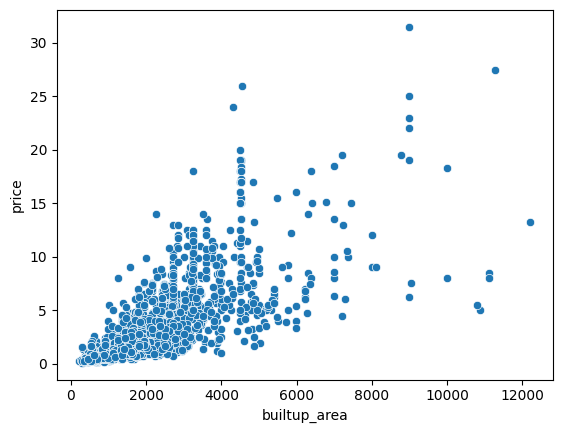

In [113]:
sns.scatterplot(x=df['builtup_area'],y=df['price'])

In [108]:
fig = px.scatter(df,x=df['builtup_area'],y=df['price'], title='Scatter Plot')

fig.show()

In [112]:
df[(df['builtup_area'] == 4304) & (df['price'] == 24)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_builtup_area,builtup_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1914,house,emaar the palm springs,sector 54,24.0,55762.081784,4304.0,plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,4304.0,NaN,1.0,1.0,0.0,1.0,0.0,1.0,122.0


In [106]:
df.loc[1283,'builtup_area'] = 4347

In [107]:
df.loc[1283,'carpet_area'] = 3915

In [114]:
df.drop(columns=['area','areaWithType','super_builtup_area','carpet_area'],inplace=True)

In [115]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,builtup_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf regal gardens,sector 90,1.26,7403.0,3.0,3.0,3,6.0,North-East,Relatively New,1603.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0
1,flat,tulip violet,sector 69,1.72,8730.0,4.0,4.0,1,12.0,North-East,Relatively New,1783.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0
2,flat,experion the heartsong,sector 108,2.28,8204.0,4.0,5.0,3+,8.0,North,Relatively New,2515.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0
3,flat,signature global city 92,sector 92,0.78,8047.0,2.0,2.0,2,2.0,not available,New Property,1083.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0
4,flat,puri diplomatic greens,sector 111,3.45,11694.0,4.0,5.0,3+,10.0,North,Relatively New,2669.0,0.0,1.0,0.0,0.0,0.0,0.0,101.0


In [116]:
df.isnull().sum()

property_type       0
society             1
sector              0
price               0
price_per_sqft      0
bedRoom             0
bathroom            0
balcony             0
floorNum           19
facing              0
agePossession       0
builtup_area        0
study room          0
servant room        0
store room          0
pooja room          0
others              0
furnishing_type     0
luxury_score        0
dtype: int64

## floorNum

In [117]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,builtup_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
213,house,jacob pura,sector 12,0.35,9722.000000,2.0,1.0,0,NaN,not available,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
290,house,independent,sector 3,1.50,10288.000000,3.0,3.0,0,NaN,not available,Old Property,1458.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408,flat,experion heartsong,sector 108,1.08,6150.000000,3.0,3.0,0,NaN,not available,Under Construction,1758.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,house,independent,sector 25,13.00,45710.000000,6.0,8.0,3+,NaN,not available,Relatively New,2844.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0
994,house,dlf new town heights,sector 86,2.47,7718.000000,4.0,4.0,3+,NaN,West,Moderately Old,3199.0,0.0,1.0,0.0,1.0,0.0,1.0,130.0
1177,house,independent,sector 2,5.60,17284.000000,8.0,6.0,3+,NaN,South-West,Moderately Old,3239.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1315,house,independent,sector 26,4.60,12198.000000,4.0,4.0,3+,NaN,not available,Old Property,3770.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
1558,house,ansal sushant lok plots,sector 43,3.30,26570.000000,1.0,1.0,0,NaN,not available,Under Construction,1242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1809,house,vipul tatvam villa,sector 48,8.50,26235.000000,4.0,4.0,1,NaN,not available,Relatively New,3239.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
1855,house,vipul tatvam villa,sector 48,8.50,26235.000000,4.0,4.0,2,NaN,East,Moderately Old,3239.0,0.0,1.0,1.0,1.0,0.0,0.0,88.0


In [118]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [119]:
df['floorNum'].fillna(2.0,inplace=True)

In [120]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
facing             0
agePossession      0
builtup_area       0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

##  facing

In [138]:
df[df['facing']=='not available']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,builtup_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3,flat,signature global city 92,sector 92,0.78,8047.000000,2.0,2.0,2,2.0,not available,New Property,1083.00,0.0,0.0,0.0,0.0,0.0,1.0,47.0
13,flat,godrej oasis,sector 88,2.65,16747.000000,3.0,3.0,3+,10.0,not available,New Property,1240.00,0.0,0.0,0.0,0.0,0.0,0.0,110.0
18,flat,signature andour heights,sector 71,0.39,9846.000000,1.0,1.0,2,1.0,not available,New Property,294.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,flat,maxworth city residences,sector 10,0.80,6400.000000,2.0,3.0,2,9.0,not available,New Property,1389.00,0.0,0.0,0.0,0.0,0.0,0.0,46.0
30,flat,tulip petals,sector 89,1.10,7097.000000,3.0,2.0,3,4.0,not available,Undefined,1550.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,flat,nbcc heights,sector 89,0.75,6578.000000,2.0,2.0,2,6.0,not available,Moderately Old,1032.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,flat,krisumi waterfall residences,sector 36,2.30,15551.000000,2.0,2.0,2,23.0,not available,Undefined,1479.00,0.0,0.0,0.0,0.0,0.0,0.0,58.0
37,flat,pareena coban residences,sector 99,1.30,6510.000000,3.0,3.0,0,16.0,not available,Undefined,1997.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,flat,smart world orchard,sector 61,2.60,14723.000000,3.0,3.0,2,2.0,not available,New Property,1475.00,0.0,0.0,0.0,0.0,0.0,0.0,47.0
46,flat,sare crescent parc,sector 92,0.70,5556.000000,3.0,3.0,2,14.0,not available,Under Construction,1260.00,0.0,0.0,0.0,0.0,0.0,0.0,38.0


<Axes: ylabel='count'>

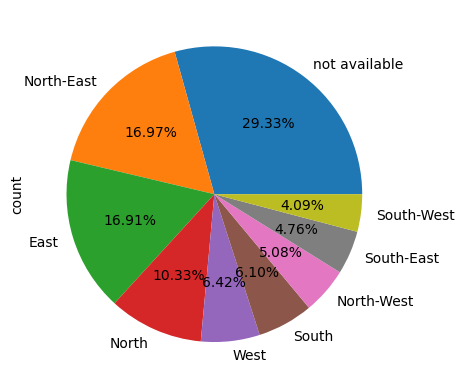

In [134]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [139]:
df.drop(columns=['facing'],inplace=True)

In [143]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
builtup_area       0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [141]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,builtup_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2349,flat,NaN,sector 78,0.6,3692.0,2.0,2.0,0,2.0,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
df.drop(index=[2349],inplace=True)

## agePossession

In [144]:
df['agePossession'].value_counts()

agePossession
Relatively New        1641
Moderately Old         583
New Property           582
Old Property           338
Undefined              324
Under Construction     268
Name: count, dtype: int64

In [145]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,builtup_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
5,house,independent,sector 17,3.50,24305.555556,6.0,6.0,3+,3.0,Undefined,1440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,house,vipul world,sector 48,3.35,5583.000000,6.0,5.0,3+,3.0,Undefined,5998.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
30,flat,tulip petals,sector 89,1.10,7097.000000,3.0,2.0,3,4.0,Undefined,1550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,flat,krisumi waterfall residences,sector 36,2.30,15551.000000,2.0,2.0,2,23.0,Undefined,1479.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0
37,flat,pareena coban residences,sector 99,1.30,6510.000000,3.0,3.0,0,16.0,Undefined,1997.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,flat,chd avenue,sector 71,0.95,7917.000000,2.0,2.0,0,5.0,Undefined,1200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,flat,godrej air,sector 85,1.75,9589.000000,3.0,3.0,2,27.0,Undefined,1825.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0
69,house,rattan garden,sector 7,0.83,17584.000000,5.0,3.0,2,3.0,Undefined,524.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,flat,signature global park,sohna road,0.55,6690.000000,2.0,2.0,3,3.0,Undefined,913.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0
80,house,sare crescent parc royal greens phase 1,sector 92,0.85,4877.000000,4.0,4.0,3,4.0,Undefined,1743.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [147]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [148]:
df['agePossession'].value_counts()

agePossession
Relatively New        1772
Moderately Old         626
New Property           607
Old Property           388
Under Construction     286
Undefined               57
Name: count, dtype: int64

In [149]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [150]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [151]:
df['agePossession'].value_counts()

agePossession
Relatively New        1781
Moderately Old         634
New Property           609
Old Property           389
Under Construction     286
Undefined               37
Name: count, dtype: int64

In [152]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [153]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [154]:
df['agePossession'].value_counts()

agePossession
Relatively New        1783
Moderately Old         669
New Property           609
Old Property           389
Under Construction     286
Name: count, dtype: int64

In [155]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
builtup_area       0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [156]:
from pathlib import Path

filepath = Path('/content/drive/MyDrive/Capstone_Project_REAL_ESTATE/missing_value_impute_gurgaon_real_estate.csv')

In [157]:
df.to_csv(filepath,index=False)